In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
LYAPUNOV = 0.91
DEL_T = 0.02
STEPS = 4000
WASHOUT = 3500

In [3]:
u = data.generate_lorenz_63(del_t=DEL_T, steps=STEPS, washout=WASHOUT)[:, 0]
T = u.shape[0]
time = np.arange(T) * DEL_T * LYAPUNOV

Text(0, 0.5, 'x')

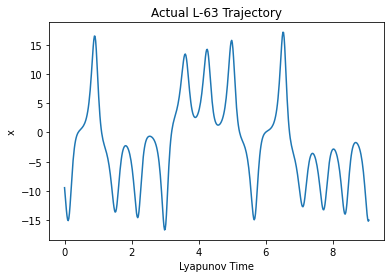

In [4]:
plt.figure(facecolor="white")
plt.plot(time, u)
plt.title("Actual L-63 Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("x")

In [5]:
seed = 42
W_out, r, A, W_in = res.train_p(u, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
test_preds = res.predict(u[0], W_out, T, A, W_in)

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


Text(0, 0.5, 'Phase Space')

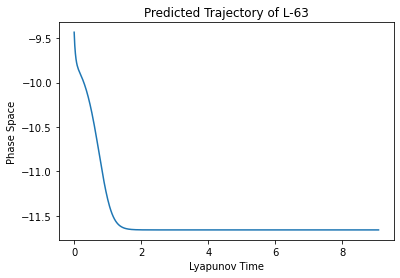

In [6]:
plt.figure(facecolor="white")
plt.plot(time, test_preds)
plt.title("Predicted Trajectory of L-63")
plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [7]:
error.RMSE(u, test_preds)

12.525126282708184

Text(0, 0.5, 'Phase Space')

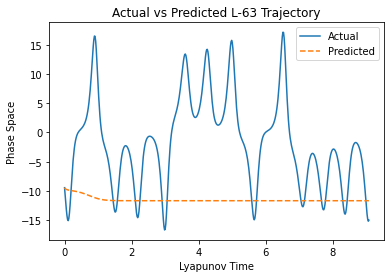

In [8]:
plt.figure(facecolor="white")
plt.plot(time, u, label="Actual")
plt.plot(time, test_preds, label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted L-63 Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [9]:
moving_rmses = np.array([error.RMSE(u[:t], test_preds[:t]) for t in range(1, T)])

Text(0, 0.5, 'RMSE')

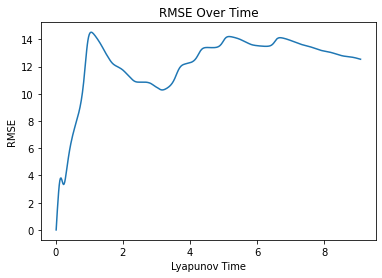

In [10]:
plt.figure(facecolor="white")
plt.plot(time[1:], moving_rmses)

plt.title("RMSE Over Time")

plt.xlabel("Lyapunov Time")
plt.ylabel("RMSE")

In [11]:
LYAPUNOV = 1
DEL_T = 0.01
STEPS = 10000
WASHOUT = 3000

In [12]:
u = data.generate_roessler(del_t=DEL_T, steps=STEPS, washout=WASHOUT)[:, 0]
T = u.shape[0]
time = np.arange(T) * DEL_T * LYAPUNOV

Text(0, 0.5, 'x')

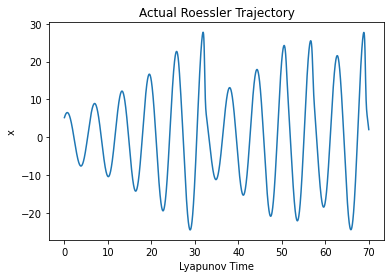

In [13]:
plt.figure(facecolor="white")
plt.plot(time, u)
plt.title("Actual Roessler Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("x")

In [14]:
seed = 42
W_out, r, A, W_in = res.train_p(u, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
test_preds = res.predict(u[0], W_out, T, A, W_in)

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:96: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


Text(0, 0.5, 'Phase Space')

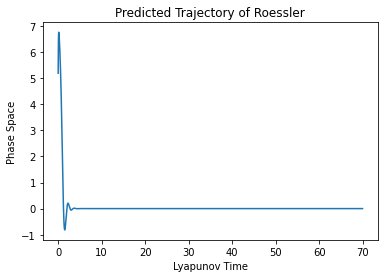

In [15]:
plt.figure(facecolor="white")
plt.plot(time, test_preds)
plt.title("Predicted Trajectory of Roessler")
plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [16]:
error.RMSE(u, test_preds)

13.042926808997342

Text(0, 0.5, 'Phase Space')

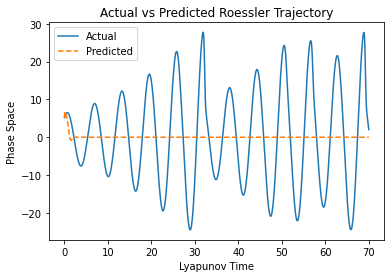

In [17]:
plt.figure(facecolor="white")
plt.plot(time, u, label="Actual")
plt.plot(time, test_preds, label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted Roessler Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [18]:
moving_rmses = np.array([error.RMSE(u[:t], test_preds[:t]) for t in range(1, T)])

Text(0, 0.5, 'RMSE')

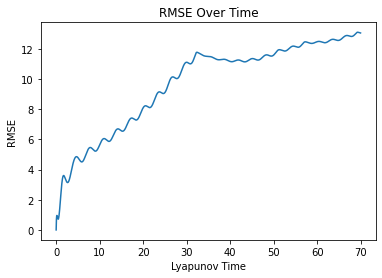

In [19]:
plt.figure(facecolor="white")
plt.plot(time[1:], moving_rmses)

plt.title("RMSE Over Time")

plt.xlabel("Lyapunov Time")
plt.ylabel("RMSE")